In [2]:
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('D:/.Arya/code/2024/python/BasicTutorial/NaiveBayes/anies.csv')
df.head()

,Unnamed: 0,created_at,id_str,full_text,quote_count,reply_count,retweet_count,favorite_count,lang,user_id_str,conversation_id_str,username,tweet_url
0,0,Fri Dec 15 04:04:44 +0000 2023,1.735511e+18,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",0.0,0,0.0,0.0,in,797761417894051840,1.735147e+18,MarahIchsan,https://twitter.com/MarahIchsan/status/1735511...
1,1,Fri Dec 15 04:04:33 +0000 2023,1.735511e+18,Suasana pedesaan memang selalu menyenangkan......,0.0,0,0.0,0.0,in,936445409605459968,1.735511e+18,Agung_wiyo,https://twitter.com/Agung_wiyo/status/17355111...
2,2,Fri Dec 15 04:04:31 +0000 2023,1.735511e+18,Program anies hanyalah mengubah nama rumah sak...,0.0,0,0.0,0.0,in,768652236,1.735511e+18,Alfakton_i,https://twitter.com/Alfakton_i/status/17355111...
3,3,Fri Dec 15 04:04:27 +0000 2023,1.735511e+18,@kumparan @aniesbaswedan anies... BERBOHONG DA...,0.0,0,0.0,0.0,in,1710823909275410432,1.735146e+18,justtheway333,https://twitter.com/justtheway333/status/17355...
4,4,Fri Dec 15 04:04:26 +0000 2023,1.735511e+18,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,0.0,0,1.0,1.0,in,1661757337554784264,1.735511e+18,singgihabdrchmn,https://twitter.com/singgihabdrchmn/status/173...


Data Cleaning

In [5]:
df = df[['full_text', 'username' , 'created_at']]
df

,full_text,username,created_at
0,"@dedy_pram Pastilah, Prabowo Anies nggak punya...",MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,Suasana pedesaan memang selalu menyenangkan......,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,Program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,@kumparan @aniesbaswedan anies... BERBOHONG DA...,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,Tidak Bicara Sesuai Fakta! Anies Dengan Lantan...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,Tiga untuk Indonesia lebih baik . tag || Gac...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,@herculep638 Makanya susah memahami apa yg dis...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,"Buat Pak Anies ,bukankah anda saat itu yg KD G...",Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,"Anies Baswedan, sosok pemimpin yang memahami b...",YKasmono4,Fri Dec 15 03:36:12 +0000 2023


In [6]:
df.shape

(515, 3)

In [7]:
df = df.drop_duplicates(subset=['full_text'])

In [8]:
df.duplicated().sum()

0

In [9]:
df = df.dropna()

In [10]:
df.isnull().sum()

full_text     0
username      0
created_at    0
dtype: int64

In [11]:
df.shape

(508, 3)

In [12]:
import re

def clean_twitter_text(text):
    text = re.sub(r'@[A-Za-z0-9_]+', '', text)  # deleting mention
    text = re.sub(r'#\W', '', text)  # deleting hashtag
    text = re.sub(r'RT[\s]+', '', text)  # deleting retweet
    text = re.sub(r'https?://\S+', '', text)  # deleting url

    text = re.sub(r'[^A-Za-z0-9 ]', '', text)  # deleting non-alphanumeric
    text = re.sub(r'\s+', ' ', text).strip()  # deleting extra spaces

    return text

df['full_text'] = df['full_text'].apply(clean_twitter_text)


In [13]:
df['full_text'] = df['full_text'].str.lower()

In [14]:
df

,full_text,username,created_at
0,pastilah prabowo anies nggak punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,tiga untuk indonesia lebih baik tag gacoan dae...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,makanya susah memahami apa yg disampaikam anie...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,buat pak anies bukankah anda saat itu yg kd gu...,Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,anies baswedan sosok pemimpin yang memahami ba...,YKasmono4,Fri Dec 15 03:36:12 +0000 2023


Preprocessing

In [15]:
# Normalization
norm = {'yg':'yang' , 'ganjar':'' , 'prabowo':'' , 'nggak':'tidak' , 'buat':'untuk'}

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: normalisasi(x))
df

,full_text,username,created_at
0,pastilah anies tidak punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong dan nipu tanpa rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,tidak bicara sesuai fakta anies dengan lantang...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023
...,...,...,...
510,tiga untuk indonesia lebih baik tag gacoan dae...,TugimanPresiden,Fri Dec 15 03:36:13 +0000 2023
511,makanya susah memahami apa yang disampaikam an...,Pribumituan,Fri Dec 15 03:36:13 +0000 2023
512,untuk pak anies bukankah anda saat itu yang kd...,Kacaback678910,Fri Dec 15 03:36:12 +0000 2023
513,anies baswedan sosok pemimpin yang memahami ba...,YKasmono4,Fri Dec 15 03:36:12 +0000 2023


In [16]:
!pip install Sastrawi

     ---------------------------------------- 0.0/209.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/209.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/209.7 kB ? eta -:--:--
     - -------------------------------------- 10.2/209.7 kB ? eta -:--:--
     ----- ------------------------------- 30.7/209.7 kB 146.3 kB/s eta 0:00:02
     ----- ------------------------------- 30.7/209.7 kB 146.3 kB/s eta 0:00:02
     ----- ------------------------------- 30.7/209.7 kB 146.3 kB/s eta 0:00:02
     ---------- -------------------------- 61.4/209.7 kB 156.1 kB/s eta 0:00:01
     ---------- -------------------------- 61.4/209.7 kB 156.1 kB/s eta 0:00:01
     ------------ ------------------------ 71.7/209.7 kB 157.5 kB/s eta 0:00:01
     ---------------- -------------------- 92.2/209.7 kB 187.5 kB/s eta 0:00:01
     ---------------- -------------------- 92.2/209.7 kB 187.5 kB/s eta 0:00:01
     ------------------- ---------------- 112.6/209.7 kB 182.2 kB

In [17]:
# Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = ['tidak']

stop_words = StopWordRemoverFactory().get_stop_words()
stop_words.extend(more_stop_words)

new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopword(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['full_text'] = df['full_text'].apply(lambda x: stopword(x))
df.head()

,full_text,username,created_at
0,pastilah anies punya prestasi,MarahIchsan,Fri Dec 15 04:04:44 +0000 2023
1,suasana pedesaan memang selalu menyenangkan ud...,Agung_wiyo,Fri Dec 15 04:04:33 +0000 2023
2,program anies hanyalah mengubah nama rumah sak...,Alfakton_i,Fri Dec 15 04:04:31 +0000 2023
3,anies berbohong nipu rasa bersalah,justtheway333,Fri Dec 15 04:04:27 +0000 2023
4,bicara sesuai fakta anies lantang sebut lampun...,singgihabdrchmn,Fri Dec 15 04:04:26 +0000 2023


In [18]:
# Tokenize

tokenized = df['full_text'].apply(lambda x:x.split())
tokenized

0                     [pastilah, anies, punya, prestasi]
1      [suasana, pedesaan, memang, selalu, menyenangk...
2      [program, anies, hanyalah, mengubah, nama, rum...
3               [anies, berbohong, nipu, rasa, bersalah]
4      [bicara, sesuai, fakta, anies, lantang, sebut,...
                             ...                        
510    [tiga, indonesia, lebih, baik, tag, gacoan, da...
511    [makanya, susah, memahami, apa, disampaikam, a...
512    [pak, anies, bukankah, saat, kd, gubernur, dki...
513    [anies, baswedan, sosok, pemimpin, memahami, k...
514    [anies, baswedan, diharapkan, membawa, perubah...
Name: full_text, Length: 508, dtype: object

In [20]:
# Stemming

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def stemming(text_cleaning):
  factory = StemmerFactory()
  stemmer = factory.create_stemmer()
  do = []
  for w in text_cleaning:
    dt = stemmer.stem(w)
    do.append(dt)
  d_clean = []
  d_clean = ' '.join(do)
  print(d_clean)
  return d_clean

tokenized = tokenized.apply(stemming)

tokenized.to_csv('D:/.Arya/code/2024/python/BasicTutorial/NaiveBayes/hasil/hasilPreprocessingA.csv', index=False)

pasti anies punya prestasi
suasana desa memang selalu senang udara segar rimbun tumbuh hijau sungai jernih penuh ikanikan kecil besar tarik angin dieng gaco adidas semalem bukan ordal anies
program anies hanya ubah nama rumah sakit se indonesia wkwk jungkook is coming olivia gaco daesang bangtan debut karina babymonster deathsgame wonbin batter up 100m views
anies bohong nipu rasa salah
bicara sesuai fakta anies lantang sebut lampung punya alat pantau polusi udara gaco anies gempa daesang pagi batter up 100m views pilih baik suhoinaaa nighthascomeep8 nctdreamxsalmasalsabil
sindir anies baswedan apbd paling besar kok mas anies gagal pimpin jakarta gaco anies gempa daesang pagi batter up 100m views pilih baik suhoinaaa nighthascomeep8 nctdreamxsalmasalsabil
alesan jelas pak anies jelas jelas jelas nyamasih engga pahamdungu arti
wow mantap sekali ini arti bro anies jadi presiden ri
dulu ajar majas kelas 8 smpsaya paham apa bilang pak anies kalo ga paham mungkin kenyam kelas 8
kasi kiki pa

In [29]:
!pip install translate

In [30]:
data = pd.read_csv('D:/.Arya/code/2024/python/BasicTutorial/NaiveBayes/hasil/hasilPreprocessingA.csv', encoding='latin1')
data.head()

,full_text
0,pasti anies punya prestasi
1,suasana desa memang selalu senang udara segar ...
2,program anies hanya ubah nama rumah sakit se i...
3,anies bohong nipu rasa salah
4,bicara sesuai fakta anies lantang sebut lampun...


In [34]:
from translate import Translator

def convert_eng(tweet):
    translator = Translator(to_lang="en", from_lang="id")
    translation = translator.translate(tweet)
    return translation

# Apply the translation function to the 'full_text' column
data['tweet_english'] = data['full_text'].apply(convert_eng)

# Save the DataFrame to a CSV file
data.to_csv('D:/.Arya/code/2024/python/BasicTutorial/NaiveBayes/terjemahan/terjemahanA.csv', index=False)

In [4]:
# Labeling 
data = pd.read_csv('D:/.Arya/code/2024/python/BasicTutorial/NaiveBayes/terjemahan/terjemahanAnies.csv', index_col=0)
data

,full_text,tweet_english
0,pasti anies punya prestasi,surely prabowo anies has achievements
1,main aman gimana jauh pikir awam saya jelas ba...,playing it safe how far do you think the publi...
2,ayoviralkan rekam jejak anies rasyid baswedan ...,ayoviralkan track record anies rasyid baswedan...
3,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...
4,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...
...,...,...
273,singgung soal janji tak maju ada pilpres anies...,alludes to the promise of no progress there is...
274,anies memang bisa percaya kata2 nya tukang obr...,anies can indeed believe the words of the pled...
275,parah banget cantik udah gitu keren dukung pak...,"it's so beautiful, it's so cool to support Mr...."
276,haha janji apa batas hak orang untuk abdi nega...,haha promise what is the limit of people's rig...


In [5]:
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

     ---------------------------------------- 0.0/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
      --------------------------------------- 10.2/636.8 kB ? eta -:--:--
     - ----------------------------------- 30.7/636.8 kB 330.3 kB/s eta 0:00:02
     --- --------------------------------- 61.4/636.8 kB 409.6 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/636.8 kB 476.3 kB/s eta 0:00:02
     ----- ------------------------------- 92.2/636.8 kB 476.3 kB/s eta 0:00:02
     -------- --------------------------- 143.4/636.8 kB 473.7 kB/s eta 0:00:02
     ---------- ------------------------- 194.6/636.8 kB 562.0 kB/s eta 0:00:01
     ---------- ------------------------- 194.6/636.8 kB 562.0 kB/s eta 0:00:01
     ------------ ----------------------- 225.3/636.8 kB 474.7 kB/s eta 0:00:01
     ------------- ---------------------- 245.8/636.8 kB 486.6 kB/s eta 0:00:01
     --------------- -------------------- 266.2/636.8 kB 46

In [6]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\HP
[nltk_data]     OMEN\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [7]:
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i , tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet)
    polaritas += analysis.polarity
    
    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append('Positif')
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append('Netral')
    else:
        total_negatif += 1
        status.append('Negatif')
    total += 1

print(f'Hasil Analysis Data:\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')

Hasil Analysis Data:
Positif = 138
Netral = 83
Negatif = 57

Total Data : 278


In [9]:
data['klasifikasi'] = status
data

,full_text,tweet_english,klasifikasi
0,pasti anies punya prestasi,surely prabowo anies has achievements,Positif
1,main aman gimana jauh pikir awam saya jelas ba...,playing it safe how far do you think the publi...,Positif
2,ayoviralkan rekam jejak anies rasyid baswedan ...,ayoviralkan track record anies rasyid baswedan...,Netral
3,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif
4,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral
...,...,...,...
273,singgung soal janji tak maju ada pilpres anies...,alludes to the promise of no progress there is...,Netral
274,anies memang bisa percaya kata2 nya tukang obr...,anies can indeed believe the words of the pled...,Netral
275,parah banget cantik udah gitu keren dukung pak...,"it's so beautiful, it's so cool to support Mr....",Positif
276,haha janji apa batas hak orang untuk abdi nega...,haha promise what is the limit of people's rig...,Negatif


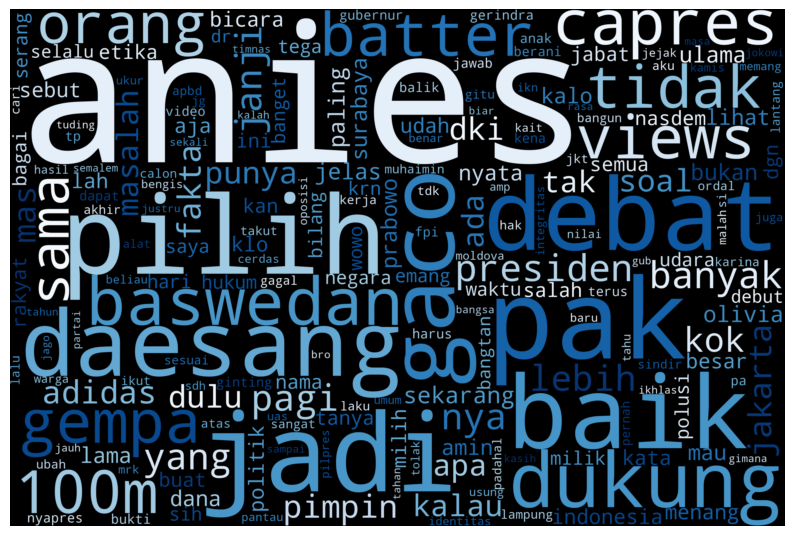

In [17]:
# Visualisasi

from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

all_words = ' '.join([tweets for tweets in data['full_text']])

wordcloud = WordCloud(
    width=3000,
    height=2000,
    random_state=3,
    background_color='black',
    colormap='Blues_r',
    collocations=False,
    stopwords=STOPWORDS
).generate(all_words)

plot_cloud(wordcloud) 

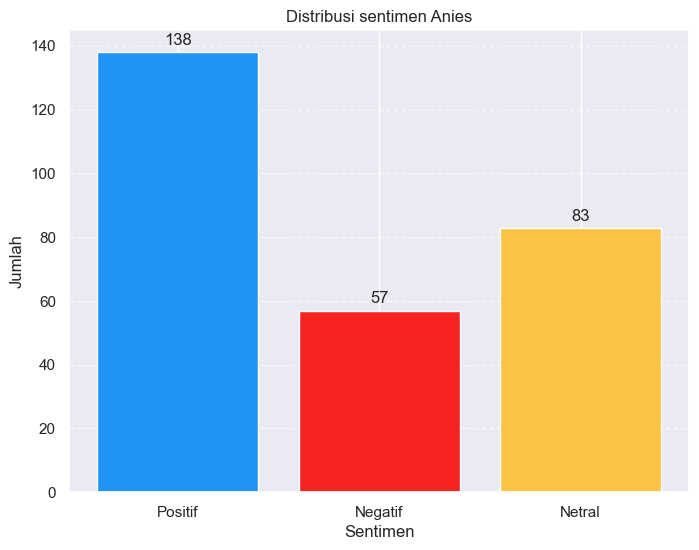

In [27]:
import seaborn as sns
sns.set_theme()

labels = ['Positif','Negatif', 'Netral']
counts = [total_positif,total_negatif,total_netral]

def show_bar_chart(labels,counts,title):
    fig , ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])
    
    for bar, count in zip(bars,counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x()+bar.get_width()/2 , height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom')
        
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)
    
    plt.show()
    
show_bar_chart(labels, counts, 'Distribusi sentimen Anies')

In [31]:
# Klasifikasi Sentimen
dataset = data.drop('full_text',axis=1 , inplace=False)
dataset = [tuple(x) for x in dataset.to_records(index=False)]

In [32]:
import random 

set_positif = []
set_negatif = []
set_netral = []

for n in dataset:
    if(n[1] == 'Positif'):
        set_positif.append(n)
    elif(n[1] == 'Negatif'):
        set_negatif.append(n)
    else:
        set_netral.append(n)

set_positif = random.sample(set_positif, k=int(len(set_positif)/2))
set_negatif = random.sample(set_negatif, k=int(len(set_negatif)/2))
set_netral = random.sample(set_netral, k=int(len(set_netral)/2))

train = set_positif + set_negatif + set_netral

train_set = []

for n in train:
    train_set.append(n)

In [33]:
from textblob.classifiers import NaiveBayesClassifier

cl = NaiveBayesClassifier(train_set)
print('Akurasi Test : ' ,cl.accuracy(dataset))

Akurasi Test :  0.7266187050359713


In [34]:
# Labeling
data_tweet = list(data['tweet_english'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i , tweet in enumerate(data_tweet):
    analysis = TextBlob(tweet , classifier=cl)
    
    if analysis.classify() == 'Positif':
        total_positif += 1
    elif analysis.classify() == 'Negatif':
        total_negatif += 1
    else:
        total_netral += 1
        
    status.append(analysis.classify())
    total+= 1
    
print(f'\nHasil Analysis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}')
print(f'\nTotal Data : {total}')


Hasil Analysis Data :
Positif = 201
Netral = 55
Negatif = 22

Total Data : 278


In [35]:
status = pd.DataFrame({'Klasisfikasi Bayes': status})
data['klasifikasi_bayes'] = status

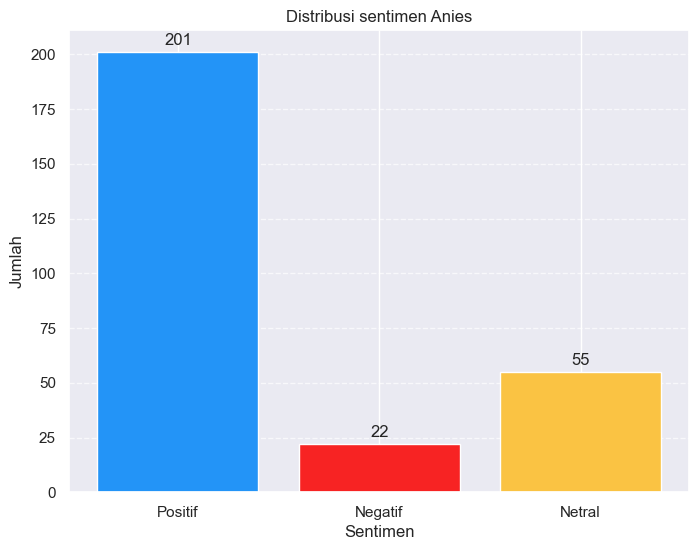

In [36]:
import seaborn as sns
sns.set_theme()

labels = ['Positif','Negatif', 'Netral']
counts = [total_positif,total_negatif,total_netral]

def show_bar_chart(labels,counts,title):
    fig , ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels,counts,color=['#2394f7','#f72323','#fac343'])
    
    for bar, count in zip(bars,counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x()+bar.get_width()/2 , height),
                    xytext=(0,3),
                    textcoords='offset points',
                    ha='center', va='bottom')
        
    ax.grid(axis='y', linestyle='--', alpha=0.7)
    
    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)
    
    plt.show()
    
show_bar_chart(labels, counts, 'Distribusi sentimen Anies')

In [37]:
data 

,full_text,tweet_english,klasifikasi,klasifikasi_bayes
0,pasti anies punya prestasi,surely prabowo anies has achievements,Positif,Positif
1,main aman gimana jauh pikir awam saya jelas ba...,playing it safe how far do you think the publi...,Positif,Positif
2,ayoviralkan rekam jejak anies rasyid baswedan ...,ayoviralkan track record anies rasyid baswedan...,Netral,Netral
3,suasana desa memang selalu senang udara segar ...,village atmosphere is always happy lush fresh ...,Positif,Positif
4,program anies hanya ubah nama rumah sakit se i...,anies program only change the name of the hosp...,Netral,Netral
...,...,...,...,...
273,singgung soal janji tak maju ada pilpres anies...,alludes to the promise of no progress there is...,Netral,Netral
274,anies memang bisa percaya kata2 nya tukang obr...,anies can indeed believe the words of the pled...,Netral,Positif
275,parah banget cantik udah gitu keren dukung pak...,"it's so beautiful, it's so cool to support Mr....",Positif,Positif
276,haha janji apa batas hak orang untuk abdi nega...,haha promise what is the limit of people's rig...,Negatif,Negatif


In [39]:
data_eval = [tuple(x) for x in data.to_records(index=False)]

for n in data_eval:
    if len(n) >= 4:
        if n[2] != n[3]:
            print(f'Text: {n[0]}\nClassifier: {n[2]}\nClassifier Bayes: {n[3]}\n')
    else:
        print('TUple tidak memiliki cukup element.')

Text: ampun ama ni orang benci fpi dan gerombol nya kena anies dulu kena tuduh mobilisasi 212 keluarga cikeas eh pangeran cikeas kalah putar pertama kena anies
Classifier: Negatif
Classifier Bayes: Positif

Text: prabowo kait apbd dki puluh trilyun dgn mampu anies atas polusi padahal masalah polusi jkt bukan soal uang tentang wenang perintah pusat stupid soal lingkung yang harus koreksi
Classifier: Negatif
Classifier Bayes: Positif

Text: anies lbh baik banding kamu hya dewan jilat amp munafik
Classifier: Netral
Classifier Bayes: Positif

Text: anak anies cakep bener anak capres muka tengil
Classifier: Netral
Classifier Bayes: Positif

Text: ini 13 poin pakta integritas pakat paslon 1 anies baswedan muhaimin iskandar dapat dukung ijtima ulama sepenuh
Classifier: Positif
Classifier Bayes: Netral

Text: kutip anies dasar atas berita 2019 prioritas bangun pedestrian cak imin beliau bicara ketidaksepakatannya atas pindah ibukota justru teguh stereotipe kalimantan
Classifier: Negatif
Classi